In [4]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
# sns.set_theme(style="whitegrid", palette=None)

In [5]:
df = pd.read_csv('../perf.csv')
df

,arg,mean,unit,name,stddev,cycles,cycle_fraction,shadow_val,shadow_desc
0,baseline,147498075,NaN,instructions,1.77%,14151396,46.94,NaN,NaN
1,baseline,30529370,ns,duration_time,1.38%,30529369,100.00,NaN,NaN
2,baseline,4286153,NaN,cache-references,5.88%,14151123,46.94,NaN,NaN
3,baseline,7520,NaN,cache-misses,40.83%,14151154,46.94,0.175,of all cache refs
4,baseline,4002,NaN,dTLB-load-misses,6.45%,15106354,50.10,0.010,of all dTLB cache hits
5,baseline,27114778,NaN,dTLB-loads,2.83%,18701268,62.03,NaN,NaN
6,baseline,35808217,NaN,branch-instructions,2.59%,15998757,53.06,NaN,NaN
7,baseline,471,NaN,branch-misses,7.79%,15998726,53.06,0.000,of all branches
8,baseline,7908296,NaN,L1-dcache-load-misses,1.58%,15043526,49.90,16.390,of all L1-dcache hits
9,baseline,48240126,NaN,L1-dcache-loads,1.34%,11448612,37.97,NaN,NaN


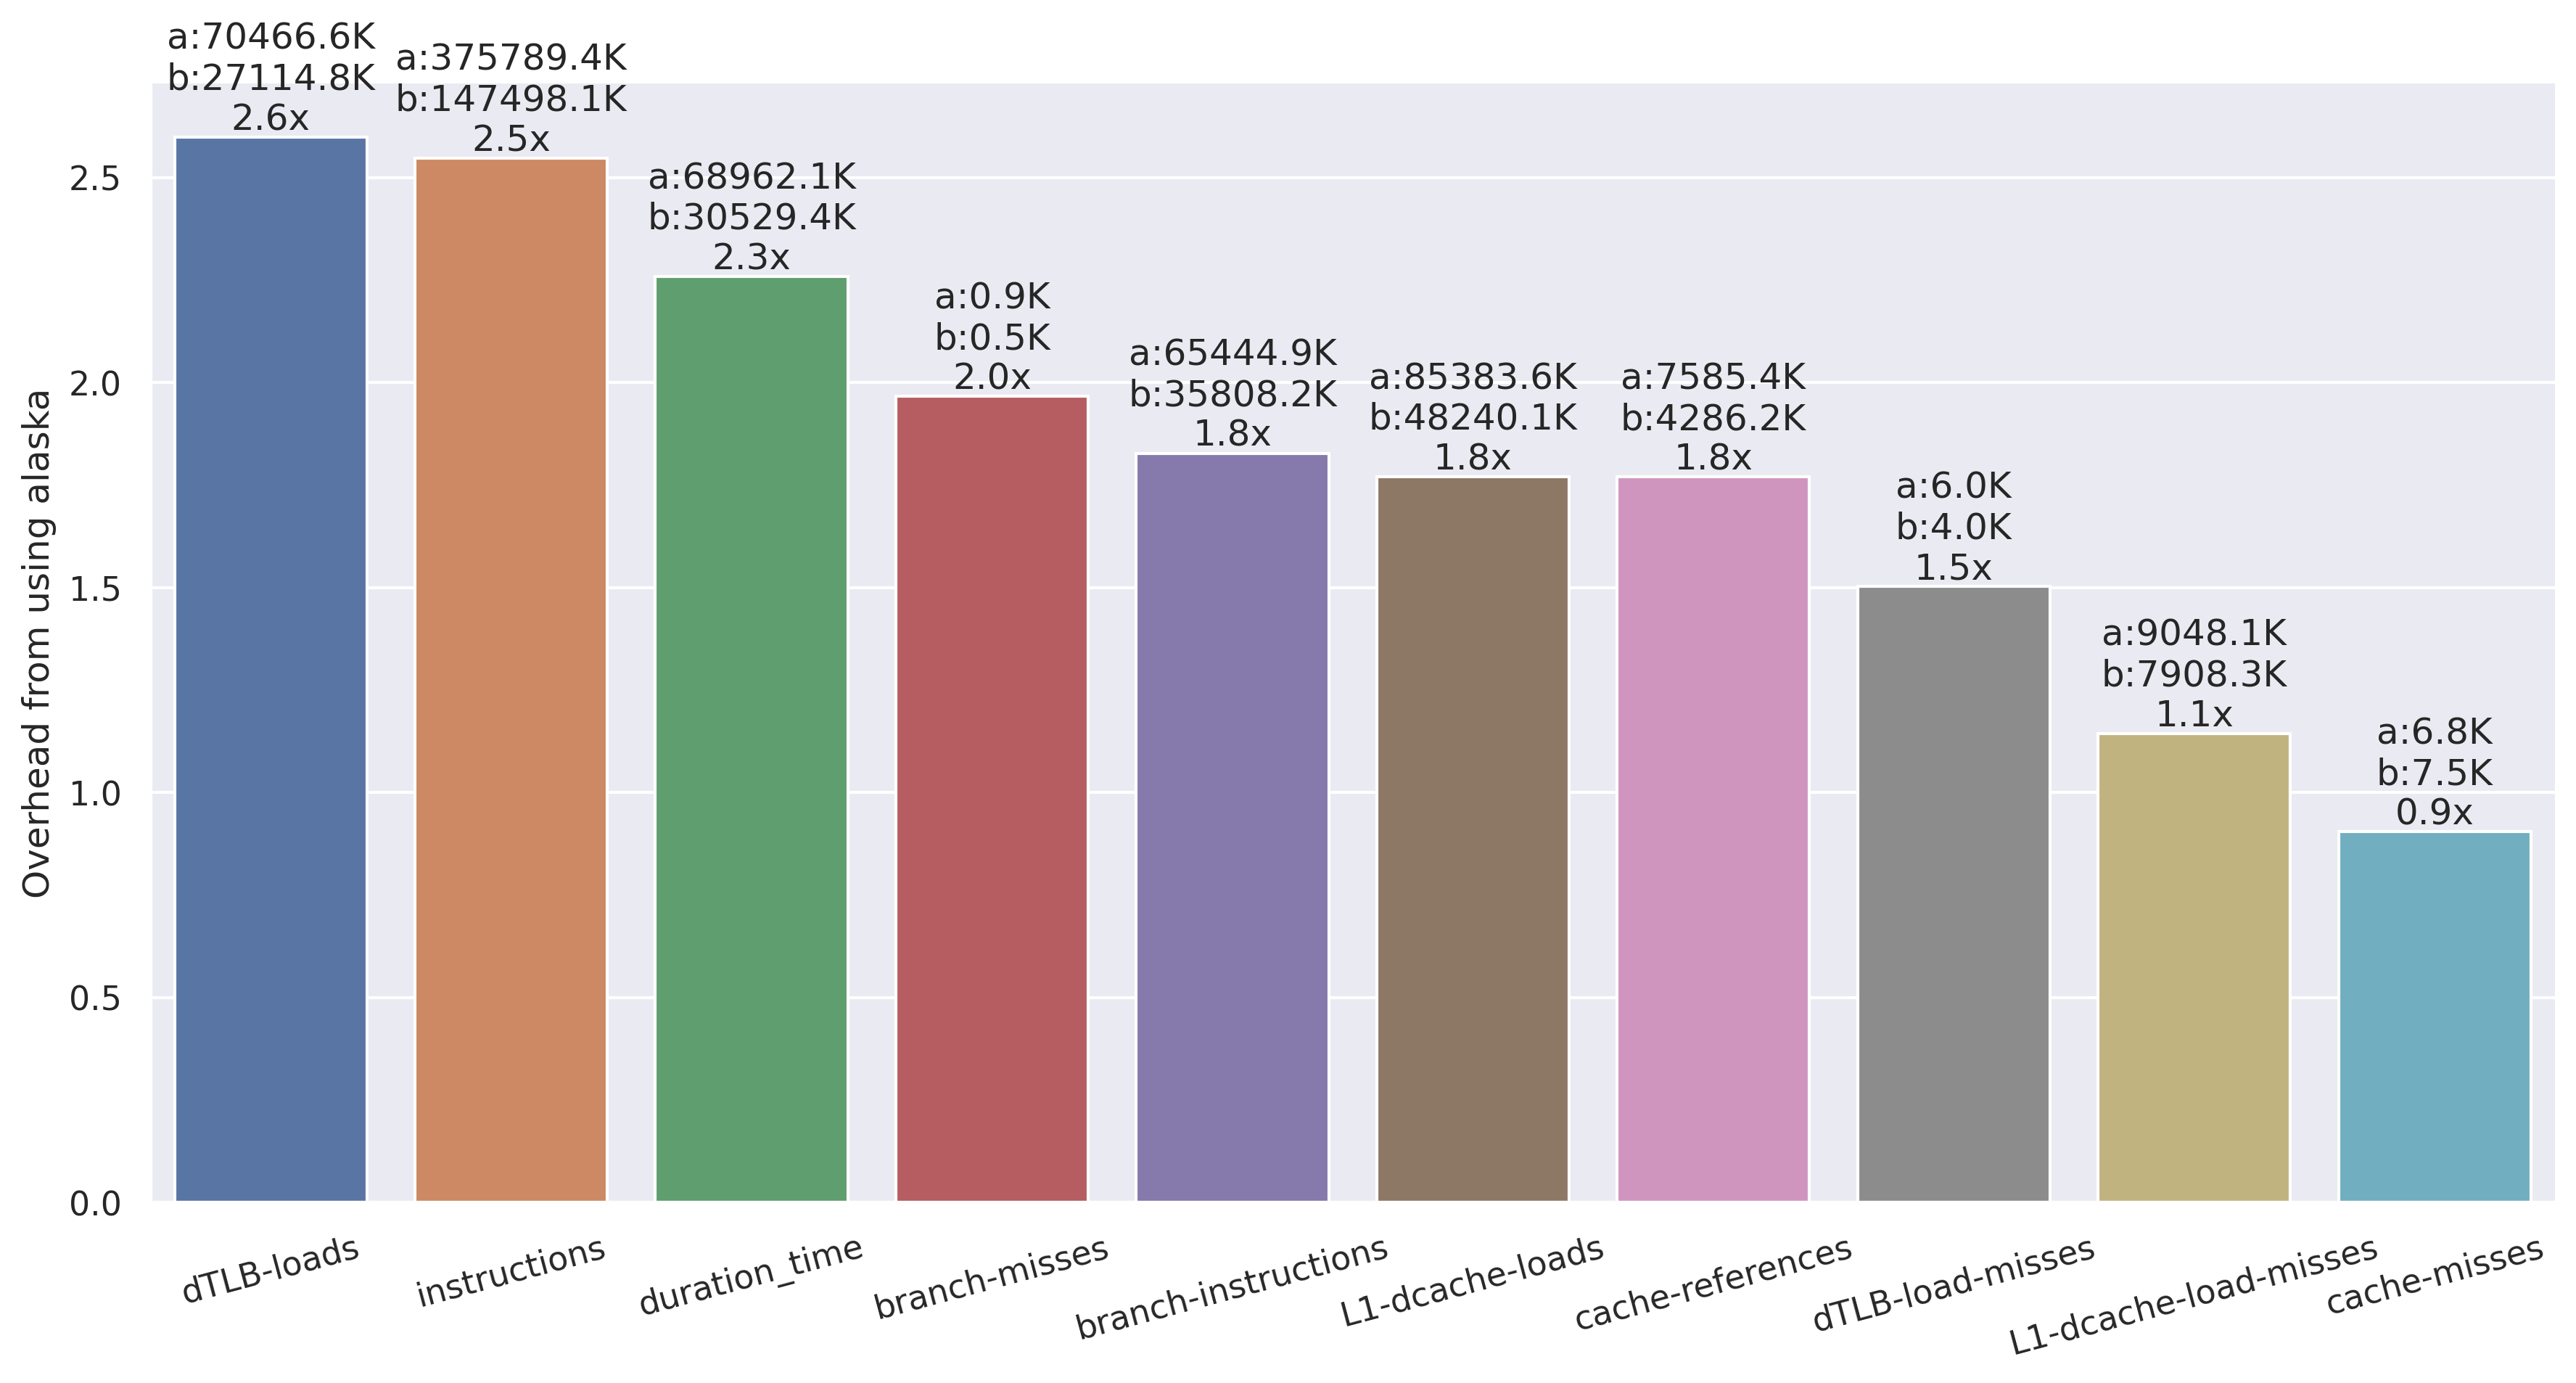

In [6]:
piv = pd.pivot(df, index='name', columns='arg', values='mean')
# display(piv)
overhead = pd.DataFrame(piv['alaska'] / piv['baseline'])
overhead['overhead'] = overhead[0]
overhead['alaska'] = piv['alaska']
del overhead[0]
overhead.reset_index(inplace=True)
o = overhead.sort_values('overhead', ascending=False).name
g = sns.catplot(data=overhead, kind='bar', x='name', y='overhead', height=6, aspect=2, order=o)
g.set_axis_labels("", "Overhead from using alaska")

ax = g.facet_axis(0, 0)
for c in ax.containers:
    alaska = [piv["alaska"][[name]].values[0] for name in o]
    baseline = [piv["baseline"][[name]].values[0] for name in o]
    labels = [f'a:{(a / 1000):.1f}K\nb:{(b / 1000):.1f}K\n{c.get_height():.1f}x' for a, b, c in zip(alaska, baseline, c)]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.xticks(rotation=15, ha='center');
